In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.table import Table
from scipy.io import readsav
from scipy.interpolate import interp2d
from copy import deepcopy

In [2]:
bias_file = readsav('Bethermin_2013_bias.save')

In [3]:
bias_file

{'mhalo': array([1.44788737e+05, 1.48845075e+05, 1.53014089e+05, 1.57309864e+05,
        1.61718315e+05, 1.66239442e+05, 1.70901414e+05, 1.75690146e+05,
        1.80605639e+05, 1.85676062e+05, 1.90873245e+05, 1.96225358e+05,
        2.01718316e+05, 2.07366203e+05, 2.13183105e+05, 2.19154936e+05,
        2.25295781e+05, 2.31605641e+05, 2.38084514e+05, 2.44760571e+05,
        2.51619726e+05, 2.58661980e+05, 2.65915501e+05, 2.73366205e+05,
        2.81028178e+05, 2.88901417e+05, 2.96985924e+05, 3.05309868e+05,
        3.13859164e+05, 3.22661982e+05, 3.31690151e+05, 3.40985926e+05,
        3.50549306e+05, 3.60366208e+05, 3.70464800e+05, 3.80845082e+05,
        3.91507054e+05, 4.02478885e+05, 4.13746491e+05, 4.25352126e+05,
        4.37267619e+05, 4.49507056e+05, 4.62112690e+05, 4.75056352e+05,
        4.88366212e+05, 5.02042269e+05, 5.16112692e+05, 5.30563396e+05,
        5.45436636e+05, 5.60718327e+05, 5.76422553e+05, 5.92577483e+05,
        6.09169032e+05, 6.26239456e+05, 6.43788752e+05,

In [4]:
np.shape(bias_file['mhalo'])

(1000,)

In [5]:
np.shape(bias_file['zhalo'])

(100,)

In [6]:
np.shape(bias_file['bias_arr'])

(100, 1000)

In [7]:
bias_interp = interp2d(np.array(bias_file['mhalo']), np.array(bias_file['zhalo']), np.array(bias_file['bias_arr']))

In [8]:
hdu = fits.open("/Users/mbethermin/SIDES/PYSIDES/OUTPUTS/pySIDES_from_original.fits")
cat = Table(hdu[1].data).to_pandas()

In [9]:
cat

,redshift,ra,dec,Mhalo,Mstar,qflag,SFR,issb,mu,Dlum,...,ICO54,ICO65,ICO76,ICO87,LCII_Lagache,ICII_Lagache,LCII_de_Looze,ICII_de_Looze,ICI10,ICI21
0,0.027082,1.386314,0.578664,9.755162e+11,1.166001e+10,False,2.131869,False,0.995326,122.324178,...,60.299789,41.618616,26.379773,14.910044,6.255425e+07,2162.181349,4.323390e+07,1494.375393,35.256016,41.052132
1,0.029516,0.454959,1.145274,9.693363e+11,2.612670e+10,True,0.000000,False,1.006201,133.557339,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000
2,0.028948,0.653517,1.053531,3.458112e+11,4.891516e+09,False,0.921371,False,1.005174,130.932469,...,37.693771,24.830785,15.271163,8.400091,5.801900e+06,177.092316,1.751020e+07,534.466683,17.568185,16.497085
3,0.027158,0.931048,0.651234,3.478761e+11,1.876074e+09,True,0.000000,False,0.993503,122.674335,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000
4,0.028611,0.787421,0.940826,3.362242e+11,1.672992e+09,False,0.268678,False,0.993735,129.376111,...,7.411665,4.853775,2.973266,1.629442,2.297588e+06,70.986414,6.843385e+06,211.433599,2.785102,3.118200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5584993,9.951501,1.372015,0.020294,8.731121e+10,1.499852e+08,True,0.000000,False,0.856639,105556.219173,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000
5584994,9.987066,1.009508,0.299231,1.691445e+10,1.022215e+07,True,0.000000,False,0.964873,105984.463771,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000
5584995,9.979968,1.084438,0.680461,3.428466e+10,3.201675e+07,True,0.000000,False,1.060378,105898.984403,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000
5584996,9.960913,1.167128,1.148331,5.714159e+10,2.027734e+07,True,0.000000,False,1.086573,105669.537276,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000


In [14]:
def plots_halo_mass_limit(zcen):
    
    dlogMh = 0.1
    Mh_bins = 10**np.arange(5,15,dlogMh)
    Nbins = len(Mh_bins)-1
    z_list = np.array([1,3,5,7])
    Nz = len(z_list)
    delta_z = 0.2

    subcat = cat.loc[np.abs(cat['redshift'] - zcen) < delta_z]
    subcat.sort_values('Mhalo', inplace = True)
    subcat.reset_index(inplace = True)
    hist, bin_edge = np.histogram(subcat['Mhalo'], bins = Mh_bins)
    N = hist
    
    hist2, bin_edge = np.histogram(subcat['Mhalo'], bins = Mh_bins, weights = subcat['LCII_de_Looze'])
    rhoCII = hist2
    
    hist3, bin_edge = np.histogram(subcat['Mhalo'], bins = Mh_bins, weights = subcat['LCII_de_Looze']**2)
    CII_squared = hist3
        
    bias_subcat = bias_interp(subcat['Mhalo'], zcen, assume_sorted = False)
    hist4, bin_edge = np.histogram(subcat['Mhalo'], bins = Mh_bins, weights = subcat['LCII_de_Looze'] * bias_subcat)
    Cl_contrib = hist4
    
    Mh = 0.5 * (Mh_bins[0:-1]+Mh_bins[1:])
    
    #plt.plot(subcat['Mhalo'], bias_subcat, '.')
    #plt.xscale('log')
    #plt.show()
     
    for yscale in ['linear','log']:
        plt.plot(Mh, N / np.max(N), label = 'Number density', color = 'grey', linestyle = '-')
        plt.plot(Mh, rhoCII / np.max(rhoCII), label = r'$\sum L_{\rm [CII]}$ (background)', color = 'royalblue',
                 linestyle = '--')
        plt.plot(Mh, CII_squared / np.max(CII_squared), label = r'$\sum L_{\rm [CII]^2}$ (Poisson)',
                 color = 'green', linestyle = '-.')
        plt.plot(Mh, Cl_contrib / np.max(Cl_contrib), label = r'$\sum L_{\rm [CII]} \times bias$ (clustering)',
                 color = 'crimson', linestyle = '-')
        
        plt.plot([10.**10.5,10.**10.5], [0.,10.], color = 'grey', linestyle = ':')
        if yscale == 'linear':
            plt.ylim([0.,1.2])
            plt.legend(loc=1)
        else:
            plt.ylim([1.e-6,2])
            plt.legend(loc=4)
        plt.xlim([1.e9,1.e14])
        plt.xscale('log')
        plt.yscale(yscale)
        plt.xlabel(r'M$_{\rm halo}$ [M$_\odot$]', size = 12)
        plt.ylabel('Contribution per M$_{halo}$ dex [normalized]', size = 12)
        plt.title('z~{:0.0f}'.format(zcen), size = 12)
        plt.tight_layout()
        plt.savefig('Effect_halo_mass_lim_'+yscale+'_z{:0.0f}'.format(zcen)+'.pdf', dpi = 150)
        plt.show()
        
        dict = {'z': zcen, 'Mh': Mh, 'rhoCII': rhoCII, 'CII_squared': CII_squared, 'Cl_contrib': Cl_contrib}
    
    return dict
        

/Users/mbethermin/opt/anaconda3/lib/python3.7/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


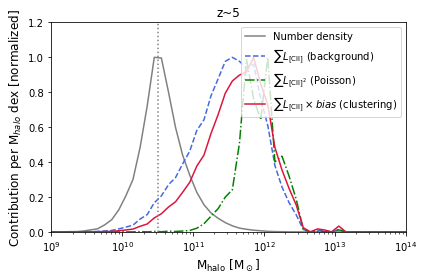

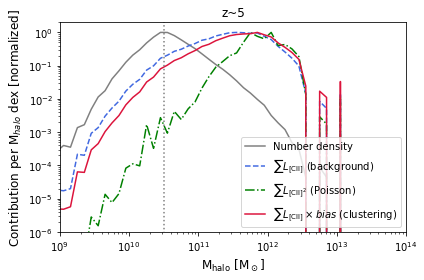

/Users/mbethermin/opt/anaconda3/lib/python3.7/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


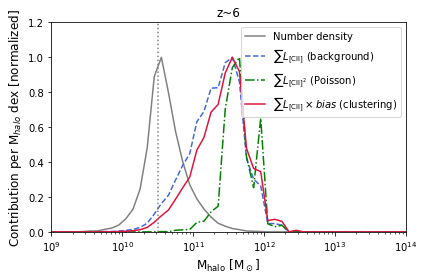

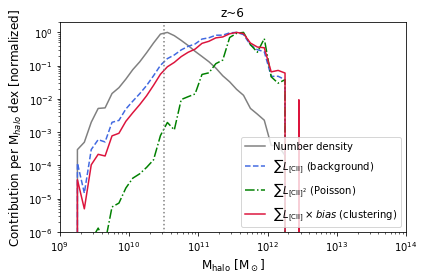

/Users/mbethermin/opt/anaconda3/lib/python3.7/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


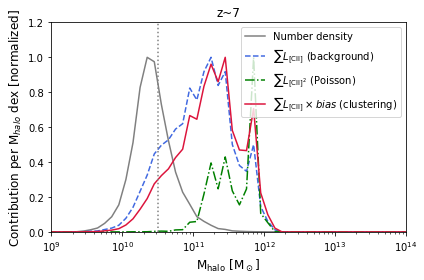

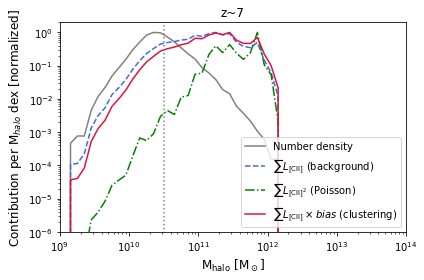

In [15]:
dict_list = []
for z in [5,6,7]:
    dict = plots_halo_mass_limit(z)
    dict_list.append(dict)

In [12]:
def estimate_missing_fraction(d, Mlim = 10.**10.5, fit_range = [10.**10.5, 1.e11]):
    
    print('z=', d['z'])
  
    obslist = ['rhoCII', 'CII_squared', 'Cl_contrib'] #list of observables to study
    
    for obs in obslist:
        
        #Compute the intergral of the initial function
        
        int_init = np.trapz(d[obs], x = np.log10(d['Mh']))
        
        high = np.where(d['Mh'] >= Mlim)
        int_above_cut = np.trapz(d[obs][high[0]], x = np.log10(d['Mh'][high[0]]))
        
        sel = np.where((d['Mh'] >= fit_range[0]) & (d['Mh'] <= fit_range[1]))
    
        res = np.polyfit(np.log10(d['Mh'][sel[0]]), np.log10(d[obs][sel[0]]), 1)
        
        print(obs, res)
        
        low = np.where(d['Mh'] < Mlim)
        obs_extrap = deepcopy(d[obs])
        obs_extrap[low[0]] = 10.**(res[0] * np.log10(d['Mh'][low[0]]) + res[1])
        
        int_extrap = np.trapz(obs_extrap, x = np.log10(d['Mh']))
        
        print('    In simu / total extrapolated = ', int_init / int_extrap)
        print('    Above Mlim / total extrapolated = ', int_init / int_extrap)
        
        plt.plot(d['Mh'], d[obs])
        plt.plot(d['Mh'], obs_extrap)
        plt.xscale('log')
        plt.yscale('log')
        
        
        
    
    return True
    

z= 5
rhoCII [0.86064316 1.66557828]
    In simu / total extrapolated =  0.9584371550515901
    Above Mlim / total extrapolated =  0.9584371550515901
CII_squared [ 1.9555311  -2.48585426]
    In simu / total extrapolated =  1.000453460636445
    Above Mlim / total extrapolated =  1.000453460636445
Cl_contrib [ 1.07875609 -0.0971693 ]
    In simu / total extrapolated =  0.9832856117110541
    Above Mlim / total extrapolated =  0.9832856117110541
z= 6
rhoCII [ 1.13840076 -1.52629336]
    In simu / total extrapolated =  0.961793297703282
    Above Mlim / total extrapolated =  0.961793297703282
CII_squared [  2.71344542 -10.59682292]
    In simu / total extrapolated =  0.9998804852139535
    Above Mlim / total extrapolated =  0.9998804852139535
Cl_contrib [ 1.36612763 -3.26258481]
    In simu / total extrapolated =  0.9813975847914677
    Above Mlim / total extrapolated =  0.9813975847914677
z= 7
rhoCII [0.50980243 4.96526047]
    In simu / total extrapolated =  0.8108213957761976
    Above

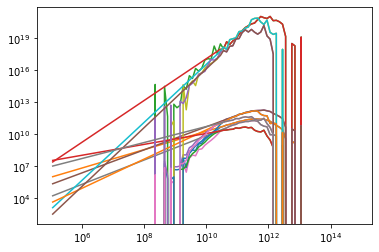

In [13]:
for dict in dict_list:
    estimate_missing_fraction(dict)